In [1]:
import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42
NUM_CLASSES = 5
NUM_EPOCHS = 500
classesMap = {0:'A +', 1:'B +',2:'C +', 3:'E +',4:'H +'}

In [2]:
dataset = 'landmarks.csv'
df = pd.read_csv(dataset)
df

,0,0.646450281,0.565575242,0.512143493,0.536735415,0.386336446,0.483176112,0.333536506,0.419391036,0.395050436,...,0.623599231,0.459367752,0.735911429,0.393158138,0.695280254,0.358504087,0.674814224,0.417064965,0.674701214,0.442427933
0,0,0.410841,0.592929,0.560942,0.547451,0.691772,0.488442,0.733234,0.420502,0.667936,...,0.391893,0.439379,0.267713,0.415209,0.255043,0.388518,0.287731,0.436357,0.300195,0.443266
1,0,0.646450,0.565575,0.512143,0.536735,0.386336,0.483176,0.333537,0.419391,0.395050,...,0.623599,0.459368,0.735911,0.393158,0.695280,0.358504,0.674814,0.417065,0.674701,0.442428
2,0,0.646450,0.565575,0.512143,0.536735,0.386336,0.483176,0.333537,0.419391,0.395050,...,0.623599,0.459368,0.735911,0.393158,0.695280,0.358504,0.674814,0.417065,0.674701,0.442428
3,0,0.487851,0.621440,0.305564,0.538390,0.189280,0.424867,0.177141,0.319205,0.288683,...,0.556545,0.437397,0.708974,0.422663,0.667415,0.384058,0.608393,0.448939,0.637061,0.456752
4,0,0.581802,0.755612,0.426105,0.725946,0.300148,0.664614,0.272424,0.596152,0.351902,...,0.567457,0.621649,0.684523,0.587771,0.639554,0.548525,0.620921,0.602776,0.636153,0.618244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,4,0.372567,0.390912,0.258315,0.469927,0.194400,0.538039,0.142778,0.602461,0.087905,...,0.399488,0.584360,0.512246,0.545403,0.494501,0.594149,0.465433,0.571639,0.445102,0.545080
1648,4,0.388814,0.216018,0.263187,0.268460,0.194008,0.324481,0.138569,0.378185,0.064274,...,0.330345,0.430161,0.487720,0.395435,0.432718,0.430489,0.393563,0.417777,0.368878,0.395978
1649,4,0.480436,0.277056,0.333318,0.331358,0.249772,0.398042,0.173027,0.462483,0.100165,...,0.484497,0.686037,0.571949,0.447712,0.542865,0.517783,0.512079,0.548658,0.486717,0.565882
1650,4,0.538669,0.310676,0.388489,0.365084,0.307966,0.440927,0.229645,0.506342,0.150856,...,0.510134,0.634709,0.647028,0.497931,0.606959,0.530564,0.577461,0.525606,0.556155,0.512055


In [3]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomModel1(nn.Module):
    def __init__(self, input_size, num_classes):
        super(CustomModel1, self).__init__()
        self.fc1 = nn.Linear(input_size, 20)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(20, 10)
        self.dropout2 = nn.Dropout(0.4)
        self.fc3 = nn.Linear(10, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return F.softmax(x, dim=1)

class CustomModel2(nn.Module):
    def __init__(self, input_size, num_classes):
        super(CustomModel2, self).__init__()
        self.fc1 = nn.Linear(input_size, 50)
        self.batch_norm1 = nn.BatchNorm1d(50)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(50, 20)
        self.batch_norm2 = nn.BatchNorm1d(20)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(20, num_classes)

    def forward(self, x):
        x = F.relu(self.batch_norm1(self.fc1(x)))
        x = self.dropout1(x)
        x = F.relu(self.batch_norm2(self.fc2(x)))
        x = self.dropout2(x)
        x = self.fc3(x)
        return F.softmax(x, dim=1)


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tqdm.notebook import tqdm


X_train, X_test, y_train, y_test = map(torch.tensor, (X_train, X_test, y_train, y_test))
y_train = y_train.long()
y_test = y_test.long()

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
total_iterations = len(train_loader) * NUM_EPOCHS  # Total iterations for the progress bar

train_losses = []
val_losses = []

input_size = 21 * 2
num_classes = NUM_CLASSES

# model of first version
model = CustomModel1(input_size, num_classes)
print(model.eval())


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Fix here

# Training loop
for epoch in tqdm(range(NUM_EPOCHS), total=NUM_EPOCHS):
    model.train()
    train_loss = 0.
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Update the metrics
        train_loss += loss.item()

    # Validation
    model.eval()
    val_loss = 0.0
    all_labels = []
    all_predictions = []
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            val_loss += criterion(outputs, labels).item()

            _, predictions = torch.max(outputs, 1)
            all_labels.extend(labels.numpy())
            all_predictions.extend(predictions.numpy())

    average_train_loss = train_loss / len(train_loader)
    average_val_loss = val_loss / len(test_loader)

    train_losses.append(average_train_loss)
    val_losses.append(average_val_loss)

CustomModel1(
  (fc1): Linear(in_features=42, out_features=20, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=20, out_features=10, bias=True)
  (dropout2): Dropout(p=0.4, inplace=False)
  (fc3): Linear(in_features=10, out_features=5, bias=True)
)


  0%|          | 0/500 [00:00<?, ?it/s]

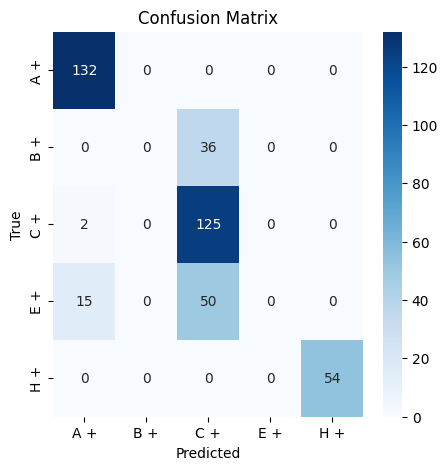

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(num_classes, num_classes))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classesMap.values(), yticklabels=classesMap.values())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

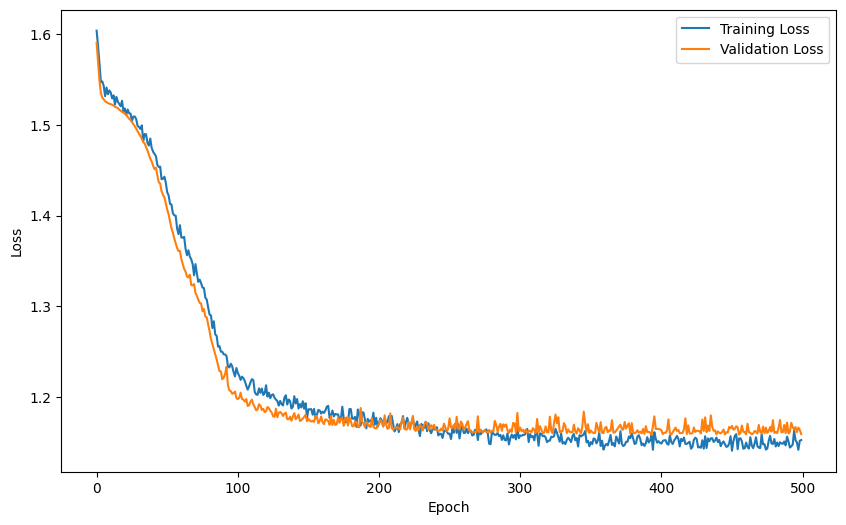

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import accuracy_score, classification_report

new_data = torch.tensor(X_dataset[0]).unsqueeze(0)
with torch.no_grad():
    model.eval()
    outputs = model(new_data)
    _, predicted = torch.max(outputs, 1)


predicted_labels = [classesMap[idx.item()] for idx in predicted]
predicted_labels

['A +']

In [10]:
import torch
from sklearn.metrics import classification_report

with torch.no_grad():
    y_pred = model(X_test)

y_pred_np = torch.argmax(y_pred, axis=1).numpy()
y_test_np = y_test.numpy()
predicted_labels = [classesMap[idx.item()] for idx in y_pred_np]

report = classification_report(y_test_np, y_pred_np, target_names=classesMap.values())
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         A +       0.89      1.00      0.94       132
         B +       0.00      0.00      0.00        36
         C +       0.59      0.98      0.74       127
         E +       0.00      0.00      0.00        65
         H +       1.00      1.00      1.00        54

    accuracy                           0.75       414
   macro avg       0.50      0.60      0.54       414
weighted avg       0.59      0.75      0.66       414



C:\Users\metua\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\metua\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\metua\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# Model on CustomModel2

In [15]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
total_iterations = len(train_loader) * NUM_EPOCHS  # Total iterations for the progress bar

train_losses = []
val_losses = []

input_size = 21 * 2
num_classes = NUM_CLASSES

model = CustomModel2(input_size, num_classes)
print(model.eval())


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Fix here

# Training loop
for epoch in tqdm(range(NUM_EPOCHS), total=NUM_EPOCHS):
    model.train()
    train_loss = 0.
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Update the metrics
        train_loss += loss.item()

    # Validation
    model.eval()
    val_loss = 0.0
    all_labels = []
    all_predictions = []
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            val_loss += criterion(outputs, labels).item()

            _, predictions = torch.max(outputs, 1)
            all_labels.extend(labels.numpy())
            all_predictions.extend(predictions.numpy())

    average_train_loss = train_loss / len(train_loader)
    average_val_loss = val_loss / len(test_loader)

    train_losses.append(average_train_loss)
    val_losses.append(average_val_loss)

CustomModel2(
  (fc1): Linear(in_features=42, out_features=50, bias=True)
  (batch_norm1): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=50, out_features=20, bias=True)
  (batch_norm2): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=20, out_features=5, bias=True)
)


  0%|          | 0/500 [00:00<?, ?it/s]

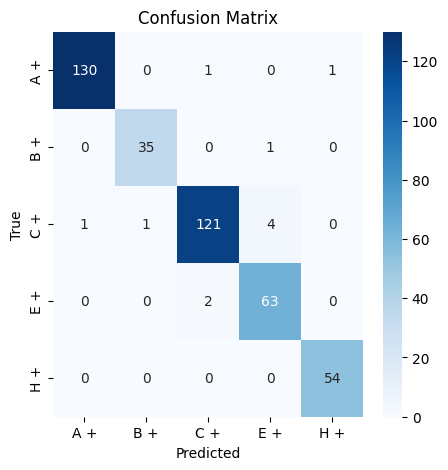

In [16]:
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(num_classes, num_classes))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classesMap.values(), yticklabels=classesMap.values())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

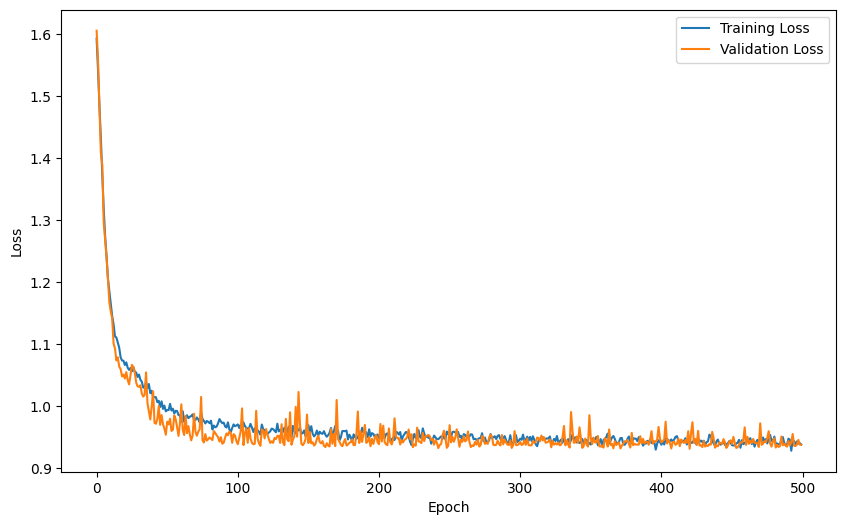

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
import torch
from sklearn.metrics import classification_report

with torch.no_grad():
    y_pred = model(X_test)

y_pred_np = torch.argmax(y_pred, axis=1).numpy()
y_test_np = y_test.numpy()
predicted_labels = [classesMap[idx.item()] for idx in y_pred_np]

report = classification_report(y_test_np, y_pred_np, target_names=classesMap.values())
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         A +       0.99      0.98      0.99       132
         B +       0.97      0.97      0.97        36
         C +       0.98      0.95      0.96       127
         E +       0.93      0.97      0.95        65
         H +       0.98      1.00      0.99        54

    accuracy                           0.97       414
   macro avg       0.97      0.98      0.97       414
weighted avg       0.97      0.97      0.97       414

